In [2]:
#imported libs
import matplotlib.pyplot as plt
from solve import *
import os
from tqdm import tqdm
import time
import numpy as np
import random

### Crafted Graphs
Created for the purpose of testing

In [3]:
def test1_graph_gen(n):
    graph = np.zeros((n,n))
    for i in range(n-1):
        for j in range(n-1):
            if i != j: graph[i,j] = 0.9
    for i in range(n-1):
        graph[i,n-1] = 1
        graph[n-1,i] = 1
    graph[0,n-1] = 1.1; graph[n-1,0] = 1.1
    return graph

In [3]:
def graph_dens_gen(n,proba=0.5):
    graph = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            isedge = random.random()>proba
            graph[i,j] = isedge
            graph[j,i] = isedge
    return graph

In [4]:
n = 20

In [5]:
X = graph_dens_gen(n)

In [6]:
enum = Enumerative(X,[i for i in range(n)])
start = time.time()
max_enumerate = enum.solve(n+1)
print('Maximum found by enumerative cutoff method {}'.format(max_enumerate))
tme = time.time()-start
print('Time taken by enumerative cutoff method {}'.format(tme))

Maximum found by enumerative cutoff method 65.0
Time taken by enumerative cutoff method 13.448909759521484


In [11]:
nb_sample = 100

#Here we store 
half_dense = []
point2_dense = []
point8_dense = []

solution_half = []
solution_2 = []
solution_8 = []

for nb_vertex in tqdm(range(5,15)):
    dummy1,tmp1 = [], []
    dummy2,tmp2 = [], []
    dummy3,tmp3 = [], []
    for _ in range(nb_sample):
        graph1,graph2,graph3 = graph_dens_gen(nb_vertex), graph_dens_gen(nb_vertex,0.2), graph_dens_gen(nb_vertex,0.8)

        enum = Enumerative(graph1,list(range(nb_vertex)))
        dummy1.append(graph1) ; tmp1.append(enum.solve(nb_vertex+1))
    
        enum = Enumerative(graph2,list(range(nb_vertex)))
        dummy2.append(graph2) ; tmp2.append(enum.solve(nb_vertex+1))
        
        enum = Enumerative(graph3,list(range(nb_vertex)))
        dummy3.append(graph3) ; tmp3.append(enum.solve(nb_vertex+1))
        
    half_dense.append(dummy1)
    solution_half.append(tmp1)
    
    point2_dense.append(dummy2)
    solution_2.append(tmp2)
    
    point8_dense.append(dummy3)
    solution_8.append(tmp3)
    

100%|██████████| 10/10 [01:44<00:00, 10.45s/it]


In [19]:
def write_graphs_opt(name,matrix):
    
    n = len(matrix)
    nb_edges = np.sum(matrix)//2
    with open(name,'w') as f:
        f.write(str(n)+' '+str(int(nb_edges))+'\n')
        for i in range(n):
            for j in range(i+1,n):
                f.write(str(i+1)+' '+str(j+1)+' '+str(int(matrix[i,j]))+'\n')
                
write_graphs_opt('test',half_dense[0][0])

In [28]:
nbv = list(range(5,15))
filename = 'opti_personal_graph.txt'
folder = 'personal_graph_examples/'

for i in range(len(half_dense)):
    for j in range(len(half_dense[i])):
        with open(filename,'a') as f:
            name1 = '05 '+str(nbv[i])+'.'+str(j)+' '+str(int(solution_half[i][j]))
            name2 = '02 '+str(nbv[i])+'.'+str(j)+' '+str(int(solution_2[i][j]))
            name3 = '08 '+str(nbv[i])+'.'+str(j)+' '+str(int(solution_8[i][j]))
            f.write(name1+'\n')
            f.write(name2+'\n')
            f.write(name3+'\n')
            
        write_graphs_opt(folder+''.join(name1.split()), half_dense[i][j])
        write_graphs_opt(folder+''.join(name2.split()), point2_dense[i][j])
        write_graphs_opt(folder+''.join(name3.split()), point8_dense[i][j])

In [3]:
# for n in range(5,10):
#     X = test1_graph_gen(n)
#     sdp = Sdp_relax_algo(X,n)
#     max_sdp = sdp.solve()
    
#     print(max_sdp/(np.sum(X)/2))

Error: (1001) The license has expired.

### Generic Graphs
From Standard test set

In [15]:
graphs = os.listdir('graph_examples/')
PATH = 'graph_examples/'

In [16]:
graph_infos = []
with open('opti_graph.txt','r') as f:
    for line in f.readlines():
        graph_infos.append(line.strip().split())

In [17]:
#Utilitaries function
def get_graph_ofVertex(n,graphs):
    result = []
    for graph in graphs:
        if int(float(graph[1].split()[0])) == n:
            result.append((graph_to_filename(graph),int(graph[2])))
    return np.array(result)

def get_graph_ofDensity(d,graphs):
    result = []
    for graph in graphs:
        if int(float(graph[1].split('.')[1])) == d:
            result.append([graph_to_filename(graph),int(graph[2])])
    return np.array(result)

def graph_to_filename(graph):
    return '_'.join(graph[:2])

In [18]:
def scores(X,n,m,filename=None):

    #Enumerative testing
    enumerate = Enumerative(X,[i for i in range(n)])
    start = time.time()
    max_enumerate = enumerate.solve()
    print('Maximum found by enumerative cutoff method {}'.format(max_enumerate))
    tme = time.time()-start
    print('Time taken by enumerative cutoff method {}'.format(tme))

    #Greedy testing
    greedy = Greedy(X,[i for i in range(n)])
    start = time.time()
    max_greedy = greedy.solve()
    print('Maximum found by greedy method {}'.format(max_greedy))
    tmg = time.time()-start
    print('Time taken by greedy method {}'.format(tmg))

    #Half_approx testing
    point_five = Half_rand_algo(X,[i for i in range(n)])
    start = time.time()
    max_point_five = point_five.solve()
    print('Maximum found by half approximative method {}'.format(max_point_five))
    tmh = time.time()-start
    print('Time taken by half approximative method {}'.format(tmh))


    #Williamson random testing
    sdp = Sdp_relax_algo(X,n)
    start = time.time()
    max_sdp = sdp.solve(method='grad')
    print('Maximum found by Goemans Williamson method {}'.format(max_sdp))
    tms = time.time()-start
    print('Time taken by Goemans Williamson method {}'.format(tms))

    
    return [(max_enumerate,tme),(max_greedy,tmg),(max_point_five,tmh),(max_sdp,tms)]

In [19]:
get_val, get_time = lambda x:x[0], lambda x:x[1]

In [20]:
#getting graphs of vertex number 60

def graph_vertex():
    enumerate_total_perf, enumerate_total_time = [], []
    greedy_total_perf, greedy_total_time = [], []
    half_total_perf, half_total_time = [], []
    dw_total_perf, dw_total_time = [], []
    for N in tqdm([60,80]):
        RESULT = []
        specimen = get_graph_ofVertex(N,graph_infos)
        for graph in specimen:
            graph_name, graph_opti = graph
            X,n,m = graph_read(PATH+graph_name)
            results = scores(X,n,m)
            RESULT.append(results+[int(graph_opti)])
        RESULT = np.array(RESULT)
    
        print(RESULT)
        enumerate_perf, enumerate_time = np.array([get_val(L) for L in RESULT[:,0]]), np.array([get_time(L) for L in RESULT[:,0]])
        greedy_perf, greedy_time =  np.array([get_val(L) for L in RESULT[:,1]]), np.array([get_time(L) for L in RESULT[:,1]])
        half_perf, half_time = np.array([get_val(L) for L in RESULT[:,2]]), np.array([get_time(L) for L in RESULT[:,2]])
        dw_perf, dw_time = np.array([get_val(L) for L in RESULT[:,3]]), np.array([get_time(L) for L in RESULT[:,3]])
        optimal = RESULT[:,4]
        
        enumerate_perf = enumerate_perf/optimal
        greedy_perf = greedy_perf/optimal
        half_perf =half_perf/optimal
        dw_perf = dw_perf/optimal
        
        enumerate_total_perf.append(np.sum(enumerate_perf)/len(enumerate_perf))
        enumerate_total_time.append(np.sum(enumerate_time)/len(enumerate_perf))
        
        greedy_total_perf.append(np.sum(greedy_perf)/len(greedy_perf))
        greedy_total_time.append(np.sum(greedy_time)/len(greedy_perf))
        
        half_total_perf.append(np.sum(half_perf)/len(half_perf))
        half_total_time.append(np.sum(half_time)/len(half_perf))
        
        dw_total_perf.append(np.sum(dw_perf)/len(dw_perf))
        dw_total_time.append(np.sum(dw_time)/len(dw_perf))
    
    return [(enumerate_total_perf,enumerate_time), (greedy_total_perf, greedy_total_time),
            (half_total_perf,half_total_time), (dw_total_perf,dw_total_time)]

In [21]:
(enumerate_total_perf,enumerate_time), (greedy_total_perf, greedy_total_time), (half_total_perf,half_total_time), (dw_total_perf,dw_total_time) = graph_vertex()

  0%|          | 0/2 [00:00<?, ?it/s]

Maximum found by enumerative cutoff method 96.0
Time taken by enumerative cutoff method 0.6104607582092285
Maximum found by greedy method 59.0
Time taken by greedy method 0.00020265579223632812
Maximum found by half approximative method 227.0
Time taken by half approximative method 9.775161743164062e-05


  0%|          | 0/2 [00:01<?, ?it/s]


TypeError: object of type 'NoneType' has no len()

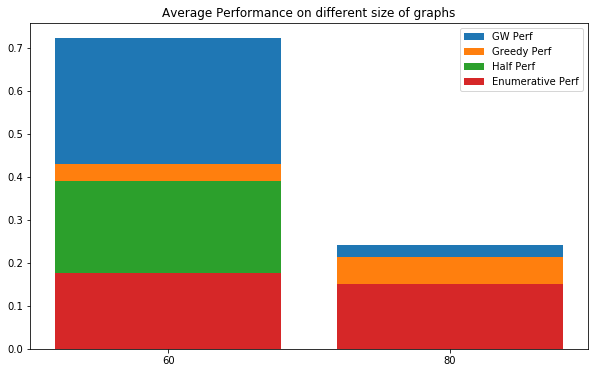

In [95]:
plt.figure(figsize=(10,6))
x=np.arange(0,2)
plt.bar(x,height=dw_total_perf,label='GW Perf')
plt.bar(x,height=greedy_total_perf,label='Greedy Perf')
plt.bar(x,height=half_total_perf,label='Half Perf')
plt.bar(x,height=enumerate_total_perf,label='Enumerative Perf')

plt.xticks(x,['60','80'])
plt.title('Average Performance on different size of graphs')
plt.legend()
plt.show()

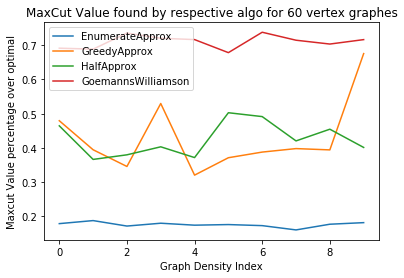

In [68]:
plt.plot(range(len(enumerate_perf)),enumerate_perf/optimal, label='EnumerateApprox')
plt.plot(range(len(greedy_perf)),greedy_perf/optimal, label='GreedyApprox')
plt.plot(range(len(enumerate_perf)),half_perf/optimal, label='HalfApprox')
plt.plot(range(len(enumerate_perf)),dw_perf/optimal, label='GoemannsWilliamson')
plt.title('MaxCut Value found by respective algo for 60 vertex graphs')
plt.xlabel('Graph Density Index')
plt.ylabel('Maxcut Value percentage over optimal')
plt.legend()
plt.show()

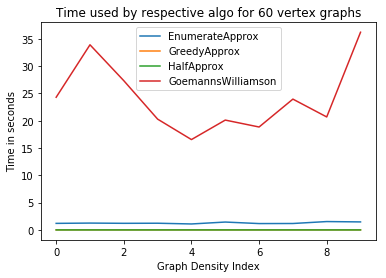

In [69]:
plt.plot(range(len(enumerate_perf)),enumerate_time, label='EnumerateApprox')
plt.plot(range(len(greedy_perf)),greedy_time, label='GreedyApprox')
plt.plot(range(len(enumerate_perf)),half_time, label='HalfApprox')
plt.plot(range(len(enumerate_perf)),dw_time, label='GoemannsWilliamson')
plt.title('Time used by respective algo for 60 vertex graphs')
plt.xlabel('Graph Density Index')
plt.ylabel('Time in seconds')
plt.legend()
plt.show()

### Deterministic